In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [11]:
results = pd.read_csv('Results/VendorA.csv', index_col=0)
results.head(5)

,Vendor,Centre,Dice_BG,Dice_LV,Dice_RV,Dice_MYO,IoU_BG,IoU_LV,IoU_RV,IoU_MYO,HD_BG,HD_LV,HD_RV,HD_MYO
External code,,,,,,,,,,,,,,
A0S9V9,F,6,0.994436,0.970864,0.890085,0.950968,0.988934,0.943377,0.801939,0.906519,3.0,4.000000,4.000000,2.828427
A1D0Q7,B,2,0.974621,0.898561,0.762248,0.785115,0.950498,0.815806,0.615833,0.646247,9.0,7.000000,9.055385,13.190906
A1D9Z7,F,6,0.991822,0.933884,0.900285,0.927455,0.983776,0.875968,0.818653,0.864724,4.0,4.000000,3.605551,8.062258
A1E9Q1,F,6,0.993537,0.965205,0.890621,0.952090,0.987157,0.932750,0.802811,0.908561,4.0,4.123106,4.000000,8.124038
A1K2P5,D,5,0.984896,0.920481,0.818624,0.897640,0.970242,0.852677,0.692941,0.814290,4.0,6.324555,9.949874,8.062258


In [12]:
grouped_by_vendor = results.groupby(['Vendor', 'Centre']).mean()
grouped_by_vendor

Dice_BG   Dice_LV   Dice_RV  Dice_MYO    IoU_BG    IoU_LV  \
Vendor Centre                                                               
A      1       0.983668  0.931516  0.833132  0.888807  0.967959  0.873205   
B      2       0.981321  0.910599  0.808786  0.866882  0.963427  0.837368   
       3       0.984033  0.924424  0.815838  0.877436  0.968631  0.861256   
C      4       0.979201  0.875535  0.761036  0.789181  0.959432  0.784746   
D      5       0.980989  0.895281  0.779456  0.844277  0.962808  0.814428   
F      6       0.995522  0.970877  0.928052  0.961159  0.991088  0.943637   

                 IoU_RV   IoU_MYO     HD_BG      HD_LV      HD_RV     HD_MYO  
Vendor Centre                                                                 
A      1       0.715006  0.801572  5.197540  11.306015  11.567869  10.669375  
B      2       0.681038  0.769664  5.391200   9.687696  13.002558  10.317743  
       3       0.689977  0.786927  5.358799   9.001911  11.329698  12.860061  
C      4       0.620214  0.676470  4.525594  19.554325  18.750153  18.306314  
D      5       0.642741  0.740482  4.047818  12.843269  14.016464  16.554289  
F      6       0.866140  0.925696  3.118405   2.424581   3.680190   4.315171

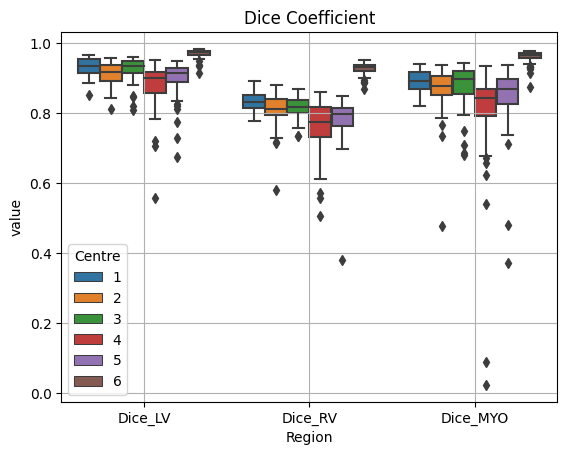

In [13]:
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['Dice_LV',
                                'Dice_RV',
                                'Dice_MYO'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("Dice Coefficient")
plt.grid(True)
plt.show()

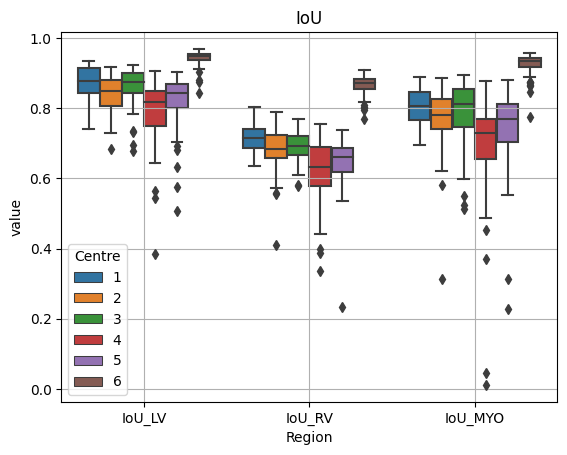

In [14]:
ax = sns.boxplot(data = results.melt(id_vars = 'Centre',
                  value_vars = ['IoU_LV',
                                'IoU_RV',
                                'IoU_MYO'],
                  var_name = 'Region'),
                hue = 'Centre',
                x = 'Region',
                y = 'value')
plt.title("IoU")
plt.grid(True)
plt.show()

In [21]:
results2 = pd.read_csv('Results/results_A_rescale_percentile.csv', index_col=0)
results2.head(5)

,Vendor,Centre,Dice_BG,Dice_LV,Dice_RV,Dice_MYO,IoU_BG,IoU_LV,IoU_RV,IoU_MYO,HD_BG,HD_LV,HD_RV,HD_MYO
External code,,,,,,,,,,,,,,
A0S9V9,A,1,0.992206,0.969943,0.842496,0.925778,0.984533,0.941641,0.727855,0.861813,3.162278,2.828427,5.385165,24.103942
A1D0Q7,B,2,0.972090,0.923932,0.753618,0.810932,0.945696,0.858619,0.604644,0.681989,9.000000,6.708204,9.055385,10.440307
A1D9Z7,A,1,0.983341,0.922714,0.864009,0.878124,0.967228,0.856517,0.760577,0.782729,4.000000,4.472136,6.082763,51.942276
A1E9Q1,A,1,0.994080,0.969714,0.891919,0.948846,0.988229,0.941208,0.804922,0.902671,3.000000,3.000000,3.605551,8.485281
A1K2P5,D,5,0.982934,0.920657,0.789860,0.872202,0.966440,0.852979,0.652701,0.773368,4.000000,6.082763,9.949874,16.124515


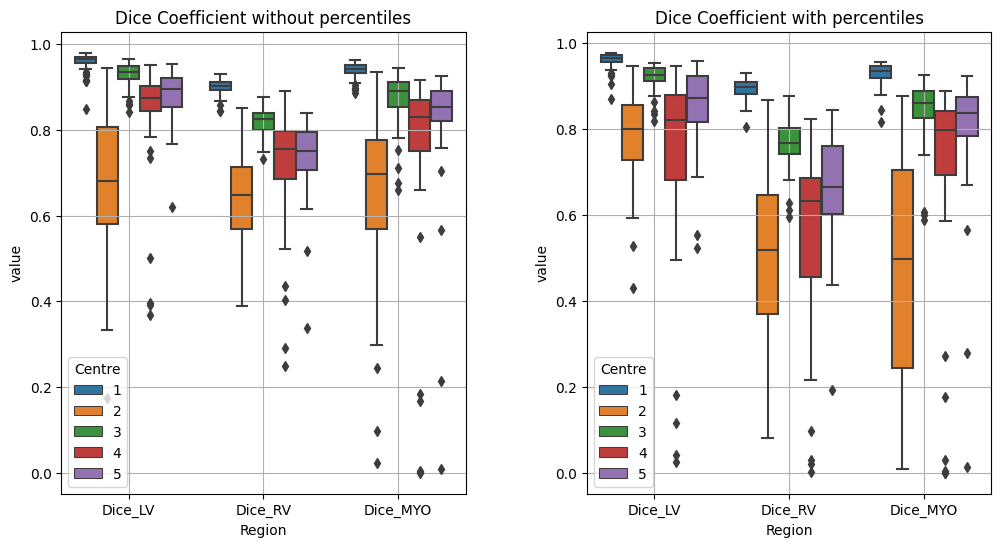

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=results.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_RV', 'Dice_MYO'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax1)

ax1.set_title("Dice Coefficient without percentiles")
ax1.grid(True)

sns.boxplot(data=results2.melt(id_vars='Centre',
                              value_vars=['Dice_LV', 'Dice_RV', 'Dice_MYO'],
                              var_name='Region'),
            hue='Centre',
            x='Region',
            y='value',
            ax=ax2)

ax2.set_title("Dice Coefficient with percentiles")
ax2.grid(True)

plt.subplots_adjust(wspace=0.3)
plt.show()